In [6]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
# import imutils
# from imutils import paths
import os
import os.path


captcha_image = "data/captcha.png"
image = cv2.imread(captcha_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


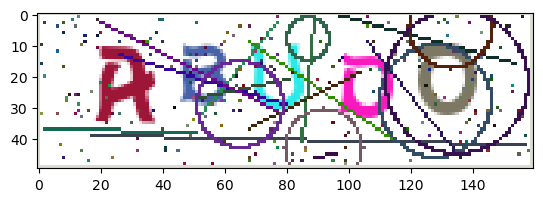

In [8]:
plt.imshow(image)
plt.show()